# Artificial Intelligence and Machine Learning

## Unit II


**Iacopo Masi**


May 5, 2022

# Tracking of Attendance to cope with COVID-19

Token prodigit for this lecture:
## `741174`

Please use this code to make your presence on prodigit

https://prodigit.uniroma1.it/


The code for the building is:
## 	`AULA 3 -- CU028-E01P01L001`

## My own latex definitions

$$\gdef\mbf#1{\mathbf{#1}}$$
$$\gdef\bmf#1{\boldsymbol{#1}}$$
$$\gdef\bx{\mbf{x}}$$
$$\gdef\bv{\mbf{v}}$$
$$\gdef\bz{\mbf{z}}$$
$$\gdef\bmu{\bmf{\mu}}$$
$$\gdef\bsigma{\bmf{\Sigma}}$$
$$\gdef\Rd#1{\in \mathbb{R}^{#1}}$$

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('seaborn-whitegrid')

font = {'family' : 'Times',
        'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)


# Aux functions

def plot_grid(Xs, Ys, axs=None):
    ''' Aux function to plot a grid'''
    t = np.arange(Xs.size) # define progression of int for indexing colormap
    if axs:
        axs.plot(0, 0, marker='*', color='r', linestyle='none') #plot origin
        axs.scatter(Xs,Ys, c=t, cmap='jet', marker='.') # scatter x vs y
        axs.axis('scaled') # axis scaled
    else:
        plt.plot(0, 0, marker='*', color='r', linestyle='none') #plot origin
        plt.scatter(Xs,Ys, c=t, cmap='jet', marker='.') # scatter x vs y
        plt.axis('scaled') # axis scaled
        
def linear_map(A, Xs, Ys):
    '''Map src points with A'''
    # [NxN,NxN] -> NxNx2 # add 3-rd axis, like adding another layer
    src = np.stack((Xs,Ys), axis=Xs.ndim)
    # flatten first two dimension
    # (NN)x2
    src_r = src.reshape(-1,src.shape[-1]) #ask reshape to keep last dimension and adjust the rest
    # 2x2 @ 2x(NN)
    dst = A @ src_r.T # 2xNN
    #(NN)x2 and then reshape as NxNx2
    dst = (dst.T).reshape(src.shape)
    # Access X and Y
    return dst[...,0], dst[...,1]


def plot_points(ax, Xs, Ys, col='red', unit=None, linestyle='solid'):
    '''Plots points'''
    ax.set_aspect('equal')
    ax.grid(True, which='both')
    ax.axhline(y=0, color='gray', linestyle="--")
    ax.axvline(x=0, color='gray',  linestyle="--")
    ax.plot(Xs, Ys, color=col)
    if unit is None:
        plotVectors(ax, [[0,1],[1,0]], ['gray']*2, alpha=1, linestyle=linestyle)
    else:
        plotVectors(ax, unit, [col]*2, alpha=1, linestyle=linestyle)

def plotVectors(ax, vecs, cols, alpha=1, linestyle='solid'):
    '''Plot set of vectors.'''
    for i in range(len(vecs)):
        x = np.concatenate([[0,0], vecs[i]])
        ax.quiver([x[0]],
                   [x[1]],
                   [x[2]],
                   [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=cols[i],
                   alpha=alpha, linestyle=linestyle, linewidth=2)

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('seaborn-whitegrid')

font = {'family' : 'Times',
        'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)


# Aux functions

def plot_grid(Xs, Ys, axs=None):
    ''' Aux function to plot a grid'''
    t = np.arange(Xs.size) # define progression of int for indexing colormap
    if axs:
        axs.plot(0, 0, marker='*', color='r', linestyle='none') #plot origin
        axs.scatter(Xs,Ys, c=t, cmap='jet', marker='.') # scatter x vs y
        axs.axis('scaled') # axis scaled
    else:
        plt.plot(0, 0, marker='*', color='r', linestyle='none') #plot origin
        plt.scatter(Xs,Ys, c=t, cmap='jet', marker='.') # scatter x vs y
        plt.axis('scaled') # axis scaled
        
def linear_map(A, Xs, Ys):
    '''Map src points with A'''
    # [NxN,NxN] -> NxNx2 # add 3-rd axis, like adding another layer
    src = np.stack((Xs,Ys), axis=Xs.ndim)
    # flatten first two dimension
    # (NN)x2
    src_r = src.reshape(-1,src.shape[-1]) #ask reshape to keep last dimension and adjust the rest
    # 2x2 @ 2x(NN)
    dst = A @ src_r.T # 2xNN
    #(NN)x2 and then reshape as NxNx2
    dst = (dst.T).reshape(src.shape)
    # Access X and Y
    return dst[...,0], dst[...,1]


def plot_points(ax, Xs, Ys, col='red', unit=None, linestyle='solid'):
    '''Plots points'''
    ax.set_aspect('equal')
    ax.grid(True, which='both')
    ax.axhline(y=0, color='gray', linestyle="--")
    ax.axvline(x=0, color='gray',  linestyle="--")
    ax.plot(Xs, Ys, color=col)
    if unit is None:
        plotVectors(ax, [[0,1],[1,0]], ['gray']*2, alpha=1, linestyle=linestyle)
    else:
        plotVectors(ax, unit, [col]*2, alpha=1, linestyle=linestyle)

def plotVectors(ax, vecs, cols, alpha=1, linestyle='solid'):
    '''Plot set of vectors.'''
    for i in range(len(vecs)):
        x = np.concatenate([[0,0], vecs[i]])
        ax.quiver([x[0]],
                   [x[1]],
                   [x[2]],
                   [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=cols[i],
                   alpha=alpha, linestyle=linestyle, linewidth=2)

# Recap previous lecture
- Multiple Solutions to Linear Regression
- Iterative Optimization Methods based on **Gradient Descent**
- From Linear Regressor to Non-Linear Regression simply lifting the features with **feature maps (basis functions)**

# Today's lecture
## Supervised, <ins>Parametric</ins> Models


### 1) From basis functions to Kernel Methods
### 2) Support Vector Machines - SVM (very popular in the 2000-2010)

## ℹ️ Where we are now


| Topic                | Hours       | 
| :-------------:      |:-------------:
| Intro, Math Recap    | 5
|          **Unsupervised Learning**      |
| Dimensionality Reduction (PCA, Eigenvectors, SVD) | 5 |
|   Clustering  (kmeans, GMM)       | 5           |
|          **Supervised Learning, Non-parametric**      |
| Nearest Neighbours | 5 |
| Decision trees | 5 |
|          **Supervised Learning, Parametric**      |
| Linear Regression with Least Squares | 5 |
| Polynomial regression, under/overfitting | 5 |
| Perceptron, Logistic Regression (LR) | 5 |
| Kernel Methods and SVM | 5 |
| **Deep Learning** |
| from LR to Neural Nets | 15 |
| **Total** | 60 |

# This lecture material is taken from

- [Mostly from Stanford class](https://www.youtube.com/watch?v=lNHaZlZJATw)
- [Stanford notes Kernels and SVM](http://cs229.stanford.edu/summer2019/cs229-notes3.pdf)
- [Tibishrinar - Chapter 4 page 43](#)
- [Sklearn](https://scikit-learn.org/stable/auto_examples/decomposition/plot_kernel_pca.html#sphx-glr-auto-examples-decomposition-plot-kernel-pca-py)

# Linear Hypothesis

We assume relations $f \longleftrightarrow y$ is **linear**
We know $D = \{\mbf{x}_i,y_i\}_{i=1}^n$ and we want to find ${\boldsymbol{\theta}}\doteq (\theta_0,\ldots,\theta_d)$

$$ f_{\boldsymbol{\theta}}(\mbf{x}) = \theta_0+ \theta_1\cdot x_1 + \theta_2\cdot x_2 + \ldots + \theta_d\cdot x_d$$

So ${\boldsymbol{\theta}}\doteq (\theta_0,\ldots,\theta_d) \in \mathbb{R}^{d+1}$.

$$ f_{\boldsymbol{\theta}}(\mbf{x}) = \big(\sum_{i=1}^d\theta_1\cdot x_1\big) + \theta_0$$

# Parametric Nature

No matter how much training points $N$ you have, the parameters are fixed in $\bmf{\theta}$.

Note that $\bmf{\theta} \in \mathbb{R}^{d=1}$.

$$ f_{\boldsymbol{\theta}}(\mbf{x}) = \sum_{i=0}^d\theta_1\cdot x_1 = \bmf{\theta}^T\mbf{x} $$

# Loss or Cost Function for Linear Regression

You see now that the loss is more explicit compare to non-parametric models  (K-NN, Decision Trees).

$$ \mathcal{J}(\mbf{\theta};\mbf{x},y)= \frac{1}{2} \sum_{i=1}^{n}\mathcal{L}\big(y_{i}, f_{\boldsymbol{\theta}}(\mbf{x}_i)\big)$$ where

$$\mathcal{L}\big(y, f_{\boldsymbol{\theta}}(\mbf{x})\big) = \big(f_{\boldsymbol{\theta}}(\mbf{x}) - y \big)^2 $$

The loss is **the squared error.**

{{eps = np.arange(-100,100);plt.plot(eps, eps**2);plt.xlabel('Difference');_=plt.ylabel('Cost');}}

# Final Least Squares solution

Assumes $\mbf{X}^T\mbf{X}$ is **invertible**:

$$\bmf{\theta} = \underbrace{(\mbf{X}^T\mbf{X})^{-1}\mbf{X}^T}_{\text{pseudo inverse}}\mbf{y} = \mbf{X}^{+}\mbf{y}$$ where:

$$ \mbf{X}^{+} \doteq (\mbf{X}^T\mbf{X})^{-1}\mbf{X}^T$$


# Going Non-linear with Basis Function

# Basis Function as (Non-Linear) Transform

Let's consider the one dimensional case. We have already seen that we could change the feature $x$ to add the bias term $\mbf{x}\doteq [x,1]$

\begin{align}
\mbf{x} &= \begin{bmatrix}
       x \\
       1
     \end{bmatrix}
     \rightarrow \quad
   \bmf{\phi}(\mbf{x}) &= \begin{bmatrix}
       x^2\\
       x \\
       1
     \end{bmatrix}
\end{align} 

So input dimension is $d=1$ then output dimension after $\bmf{\phi}(\cdot)$ is $m=2$.

In this case we used a second order polynomial to lift up the features
$$\bmf{\phi}_m(\mbf{x}) = x^m$$

# Basis Function as Non-Linear Transform

$$ f_{\boldsymbol{\theta}}(\mbf{x}) = \sum_{i=0}^m\theta_1\cdot x_1 = \bmf{\theta}^T\bmf{\phi}(\mbf{x}) = \theta_0  + \theta_1\cdot x +\theta_2\cdot x^2  $$

**Important observation**:
- This is still **linear function** of the parameters $\theta$, infact we still **take the dot product**
- Though it is **NON linear function** of the features $x$

# Two Observations

- This is still <ins>**linear function**</ins> of the parameters $\theta$
    - **Good** we can solve it with Linear Regression
- Though it is <ins>**NON linear function**</ins> of the features $x$
    - **Even better**, we capture non-linearity in the data

# Polynomial Regression (Basis Function $\bmf{\phi}_m(\mbf{x}) = x^m$)

$$ f_{\boldsymbol{\theta}}(\mbf{x}) = \sum_{i=0}^m\theta_1\cdot x_1 = \bmf{\theta}^T\bmf{\phi}(\mbf{x}) = \theta_0  + \theta_1\cdot x +\theta_2\cdot x^2  $$

**Important observation**:
- This is still **linear function** of the parameters $\theta$, infact we still **take the dot product**
- Though it is **NON linear function** of the features $x$
- $m$ is the degree of the **Polynomial** we consider
- $m$ the higher the degree, the more expressive is the model

# Limitations of Basis Functions

**Advantage:** It is simple, and your problem stays convex and well behaved. (i.e. you can still use your original gradient descent code, just with the higher dimensional representation)

**Disadvantage:** ϕ(x) might be **Very** high dimensional.


```python
X = PolynomialFeatures(interaction_only=True).fit_transform(X)
```

# Terminology (from Stanford notes)

Let's consider the one dimensional case. We have already seen that we could change the feature $x$ to add the bias term $\mbf{x}\doteq [x,1]$

\begin{align}
\mbf{x} &= \begin{bmatrix}
       x \\
       1
     \end{bmatrix}
     \rightarrow \quad
   \bmf{\phi}(\mbf{x}) &= \begin{bmatrix}
       x^2\\
       x \\
       1
     \end{bmatrix}
\end{align} 

- $\mbf{x}$ is the "attribute"
- $\bmf{\phi}(\mbf{x})$ is the "feature"
- $\bmf{\phi(\cdot})$ is the "feature map".

# GD on Attributes $\mbf{x}$



$$
\begin{aligned}
\theta &:=\theta+\alpha \sum_{i=1}^{n}\left(y^{(i)}-h_{\theta}\left(x^{(i)}\right)\right) x^{(i)} \\
&:=\theta+\alpha \sum_{i=1}^{n}\left(y^{(i)}-\theta^{T} x^{(i)}\right) x^{(i)}
\end{aligned}
$$


# GD on feature $\bmf{\phi}(\mbf{x})$


We assume a feature map $\bmf{\phi} : \mathbb{R}^d \mapsto \mathbb{R}^p$

$$
\begin{aligned}
\theta&\doteq\theta+\alpha \sum_{i=1}^{n}\left(y^{(i)}-\theta^{T} \bmf{\phi}(x)^{(i)}\right) \bmf{\phi}(x)^{(i)}
\end{aligned}
$$


# Higher Feature Maps are prohibitive

Assume $\mbf{x} \in \mathbb{R}^d$ and we want to map it to $\bmf{\phi}(\mbf{x}) \in \mathbb{R}^p$.
$\bmf{\phi}(\mbf{x})$ be the vector that contains all the monomials of $x$ with degree $\leq$ 3


$$
\phi(x)=\left[\begin{array}{c}
1 \\
x_{1} \\
x_{2} \\
x_{d} \\
\vdots \\
x_{1}x_1(x_1^{2}) \\
x_{1} x_{2} \\
x_{1} x_{3} \\
\vdots \\
x_{2} x_{1} \\
\vdots \\
x_{1}^{3} \\
x_{1}^{2} x_{2} \\
\vdots
\end{array}\right]
$$

$\bmf{\phi}(\mbf{x})$ is of $\mathcal{O}(d^3)$; if d is high dimensional, $d^3$ may become prohibitive. Note that $\bmf{\theta}$ will be too of $d^3$.

# Kernel Methods

# Kernel Methods

## First Idea: do no write $\bmf{\theta}$ explicitly but as a linear combination of training features

$$ \bmf{\theta}^{(t)} = \sum_i^n \beta_i \bmf{\phi}(\mbf{x}_i)$$

# Inductive Proof

1. At initialization $\bmf{\theta}$ is zero so it can be expressed $\bmf{\theta} = \sum_{i=1}^n 0\cdot\bmf{\phi}(\mbf{x}) $

2. At iteration $t=1$ then show
    $\bmf{\theta} = \sum_{i=1}^n \beta_i \bmf{\phi}(\mbf{x}_i)$ holds

    $$\bmf{\theta}^{t=1} \leftarrow \bmf{\theta}^{t=0}+\alpha \sum_{i=1}^{n}\left(y^{(i)}-\theta_{t=0}^{T} \bmf{\phi}(x)^{(i)}\right) \bmf{\phi}(x)^{(i)}$$

Given that $\bmf{\theta}$ is zero at $t=0$, we have:
    $$\bmf{\theta}^{t=1} \leftarrow \underbrace{\bmf{\theta}^{t=0}}_{zero}+\alpha \sum_{i=1}^{n}\left(y^{(i)}-\underbrace{\theta_{t=0}^{T}}_{zero} \bmf{\phi}(x)^{(i)}\right) \bmf{\phi}(x)^{(i)}$$

$$\bmf{\theta}^{t=1} \leftarrow  \sum_{i=1}^{n} \underbrace{\alpha y^{(i)}}_{\beta_i} \bmf{\phi}(x)^{(i)}$$

# Inductive Step

We apply the basic definition of GD update and assume $\theta^{t} = \sum \beta_i \bmf{\phi}(\mbf{x}_i)$ per inductive step: 
$$
\begin{aligned}
\theta^{t+1} &:=\theta^{t}+\alpha \sum_{i=1}^{n}\left(y^{(i)}-\theta{^{t}}^{T} \phi\left(x^{(i)}\right)\right) \phi\left(x^{(i)}\right) \\
\end{aligned}
$$


$$
\begin{aligned}
&=\underbrace{\sum_{i=1}^{n} \beta_{i} \phi\left(x^{(i)}\right)}_{\theta^t}+\alpha \sum_{i=1}^{n}\left(y^{(i)}- \underbrace{\Big( \sum_{j=1}^{n} \beta_{j} \phi\left(x^{(j)}\right) \Big)^T}_{\theta^t}\phi\left(x^{(i)}\right)\right) \phi\left(x^{(i)}\right) \\
&=\sum_{i=1}^{n} \underbrace{\Big[\beta_{i} +\alpha \left(y^{(i)}- \underbrace{ \sum_{j=1}^{n} \beta_{j} \phi\left(x^{(j)}\right)^T}_{\theta^t}\phi\left(x^{(i)}\right)\right) \Big]}_{\text {new} \beta_{i}} \phi\left(x^{(i)}\right)
\end{aligned}
$$


# Now, we do not update anymore $\theta$ but $\beta$!

**Gradient Descent** written as coefficients of feature vectors:

For each training sample, $\forall i=[0\ldots n]:$

$$ \beta_i^{t+1} \leftarrow  \beta_i^{t} + \alpha \Big(y_i -\sum_{j=1}^n \beta_j^t\bmf{\phi{(\bmf{x}_j)^T}}\bmf{\phi}{(\bmf{x}_i)}\Big)$$

# Observations

$$ \beta_i^{t+1} \leftarrow  \beta_i^{t} + \alpha \Big(y_i -\sum_{j=1}^n \beta_j^t\bmf{\phi{(\bmf{x}_j)^T}}\bmf{\phi}{(\bmf{x}_i)}\Big)$$

1. $\beta_i$ is the only thing that changes. We can thus precompute once before iterating $\bmf{\phi{(\bmf{x}_j)^T}}\bmf{\phi{(\bmf{x}_i)}}$. 
    1. Note that $\bmf{\phi{(\bmf{x}_j)^T}}\bmf{\phi{(\bmf{x}_i)}}$ is inner product $\Big\langle \bmf{\phi{(\bmf{x}_j)}},\bmf{\phi{(\bmf{x}_i)}} \Big\rangle$
    2. $\Big\langle \bmf{\phi{(\bmf{x}_j)}},\bmf{\phi{(\bmf{x}_i)}} \Big\rangle$ is a scalar in $\mathbb{R}$.
2. The $\beta_i$ grows with the number of training samples and **NOT** with the dimension of parameters.
3. We can precompute $\Big\langle \bmf{\phi{(\bmf{x}_j)}},\bmf{\phi{(\bmf{x}_i)}} \Big\rangle~~ \forall i,j$ before the iteration starts.
    

# Kernel Methods

## Second Idea: $\Big\langle \bmf{\phi{(\bmf{x}_j)}},\bmf{\phi{(\bmf{x}_i)}} \Big\rangle$ use a kernel function to compute the feat. map inner product

# Kernel Function

**Problem:** We still have to compute $\Big\langle \bmf{\phi{(\bmf{x}_j)}},\bmf{\phi{(\bmf{x}_i)}} \Big\rangle$ where $\bmf{\phi{(\bmf{x}_j)}}$ is potentially infinite, aka $ \bmf{\phi(x)} \in \mathbb{R}^p,~ p \mapsto \infty$

### Idea: Instead of computing the inner product of feature maps, compute a proxy function (kernel) instead


# Kernel Function

It assumes that $\mbf{x} \in \mathcal{X}$, in our case $\mbf{x} \in \mathbb{R}^d$ and $\mathcal{X}\doteq \mathbb{R}^d$.

Kernel is a function $K : \mathcal{X} \times \mathcal{X} \mapsto \mathbb{R}$:
$$ K(\mbf{x},\mbf{z}) \doteq \Big\langle \bmf{\phi{(\bmf{x})}},\bmf{\phi{(\bmf{z})}} \Big\rangle $$

- Note that $K$ takes as input the attribute $\mbf{x}$ not the feature map $\bmf{\phi{(\bmf{x})}}$!
- The kernel $K$ does some "magic" inside to compute from $\mbf{x}$ the dot product of feature maps.

# Kernel Function - Poly$^3$

It assumes that $\mbf{x} \in \mathcal{X}$, in our case $\mbf{x} \in \mathbb{R}^d$ and $\mathcal{X}\doteq \mathbb{R}^d$.

Kernal is a function $K : \mathcal{X} \times \mathcal{X} \mapsto \mathbb{R}$:
$$ K(\mbf{x},\mbf{z}) \doteq \Big\langle \bmf{\phi{(\bmf{x}_j)}},\bmf{\phi{(\bmf{z}_i)}} \Big\rangle = 1 + \langle \mbf{x},\mbf{z}\rangle + \langle \mbf{x},\mbf{z}\rangle ^2 + \langle \mbf{x},\mbf{z}\rangle^3  $$


$$
\phi(x)=\left[\begin{array}{c}
1 \\
x_{1} \\
x_{2} \\
x_{d} \\
\vdots \\
x_{1}^{2} \\
\vdots \\
x_{1}^{3} \\
\end{array}\right]
$$

- Dot product in the feature space takes $\approx \mathcal{O}(d^3)$ while with the kernel function takes $\approx \mathcal{O}(d)$.
- The dot product between two high dimensional function map is equal to compute the kernel function directly at much cheaper cost.
- Each kernel is specific to each feature map.

# Learning Kernelized Linear Regression

1. Compute all the values $K\left(x^{(i)}, x^{(j)}\right) \triangleq\left\langle\phi\left(x^{(i)}\right), \phi\left(x^{(j)}\right)\right\rangle$ for all $i, j \in\{1, \ldots, n\}$. Set $\beta:=0$.
2. Loop:
$$
\forall i \in\{1, \ldots, n\}, \quad \beta_{i}:=\beta_{i}+\alpha\left(y^{(i)}-\sum_{j=1}^{n} \beta_{j} K\left(x^{(i)}, x^{(j)}\right)\right)
$$
<br><br>**OR** in vector notation, letting $K$ be the $n \times n$ matrix with $K_{i j}=$ $K\left(x^{(i)}, x^{(j)}\right)$, we have:

$$
\bmf{\beta}:=\bmf{\beta}+\alpha(\vec{y}-K \bmf{\beta})
$$

# Dimension Sanity Check
$$
\bmf{\beta}:=\underbrace{\bmf{\beta}}_{\mathbb{R}^n}+\alpha(\underbrace{\mbf{y}}_{\mathbb{R}^n}- \underbrace{\mbf{K}}_{\mathbb{R}^{n\times n}} \underbrace{\bmf{\beta}}_{\mathbb{R}^n})
$$

# Prediction with Kernelized Linear Regression 

Assuming we have to predict for a test example $\mbf{x}$:

$$ f_{\bmf{\theta}}(\mbf{x}) = \bmf{\theta}^T \bmf{\phi(\mbf{x})}=f_{\bmf{\beta}}(\mbf{x}) = \sum_{i=1}^n \beta_i \bmf{\phi(\mbf{x}_i)}^T\bmf{\phi(\mbf{x})} = \sum_{i=1}^n \beta_i K(\mbf{x}_i,\mbf{x})$$


# Important Observations

- Learning:
$$
\bmf{\beta}:=\bmf{\beta}+\alpha(\vec{y}-K \bmf{\beta})
$$
Prediction:   $$f_{\bmf{\beta}}(\mbf{x})  =\sum_{i=1}^n \beta_i K(\mbf{x}_i,\mbf{x})$$

- Take out message: $\bmf{\phi({\mbf{x})}}$ **does not appear whatsoever!** _(good)_ 😀
- To make a prediction, we need to **remember all our training examples** _(not soo good)_  😅

# Important Observations

<center><img src='figs/kernel_design_matrix.png' width=30%></center>

# Important Observations

<center><img src='figs/kernel_design_matrix_2.png' width=50%></center>

# Kernel Methods are so generic that you can _"kernelize"_ a lot of approaches

- **Kernelized** Linear Regression
- **Kernel** PCA
- **Kernel** SVM _(we'll cover SVM in the next lecture)_
- ....

<img src='https://scikit-learn.org/stable/_images/sphx_glr_plot_kernel_pca_002.png' width='70%'/>

# Who comes first? Kernels of Feature maps?

# Kernel Example

$$ K(\mbf{x},\mbf{z}) = \big(\langle \mbf{x}^T \mbf{z} \rangle \big)^2$$

Can be written as:

$$
\begin{aligned}
K(x, z) &=\left(\sum_{i=1}^{d} x_{i} z_{i}\right)\left(\sum_{j=1}^{d} x_{j} z_{j}\right) \\
&=\sum_{i=1}^{d} \sum_{j=1}^{d} x_{i} x_{j} z_{i} z_{j} \\
&=\sum_{i, j=1}^{d}\left(x_{i} x_{j}\right)\left(z_{i} z_{j}\right)
\end{aligned}
$$

# Kernel Example

The previous kernel corresponds to this feature map $\phi(x)$ with $d=3$: 


$$
\phi(x)=\left[\begin{array}{c}
x_1 x_1\\
x_1 x_2\\
x_1 x_3\\
x_2 x_1\\
x_2 x_2\\
x_2 x_3\\
x_3 x_1\\
x_3 x_2\\
x_3 x_3\\
\end{array}\right]
$$

$$
K(x,z) = \phi(x)\phi(z) = \left[\begin{array}{c}
x_1 x_1\\
x_1 x_2\\
x_1 x_3\\
x_2 x_1\\
x_2 x_2\\
x_2 x_3\\
x_3 x_1\\
x_3 x_2\\
x_3 x_3\\
\end{array}\right]^T
\left[\begin{array}{c}
z_1 z_1\\
z_1 z_2\\
z_1 z_3\\
z_2 z_1\\
z_2 z_2\\
z_2 z_3\\
z_3 z_1\\
z_3 z_2\\
z_3 z_3\\
\end{array}\right]
$$

$$K(x,z) = \phi(x)\phi(z) = (x_1 x_1)(z_1 z_1) + \ldots + (x_3 x_3)(z_3 z_3) =\sum_{i=1}^{d} \sum_{j=1}^{d} x_{i} x_{j} z_{i} z_{j}$$

# Kernel Matrix as Similarity Matrix


- $ \bmf{K}(x,z) = \bmf{\phi}(x)\bmf{\phi}(z)$ is high for similar $\bmf{\phi}(x)\bmf{\phi}(z)$ _(more or less oriented in the same direction)_
- $ \bmf{K}(x,z) = \bmf{\phi}(x)\bmf{\phi}(z)$ is low for dissimilar $\bmf{\phi}(x)\bmf{\phi}(z)$ _(ortogonal)_ 

# RBF (Radial Basis Function) or Gaussian Kernel

$$ K(\mbf{x},\mbf{z}) = \exp\Big(-\frac{\|\mbf{x} - \mbf{z}\|^2}{2\sigma^2}\Big) = \exp( -\gamma \| \mbf{x} -\mbf{z}  \|^2)$$

- $\mbf{x},\mbf{z}$ are equal then $\exp(0)=1$
- $\mbf{x},\mbf{z}$ are very different then $\exp(-\infty)=0$
- RBF maps the attribute into a **infinite dimensional** space.

# How does a Kernel Matrix Look like (w/ Gaussian Kernel)

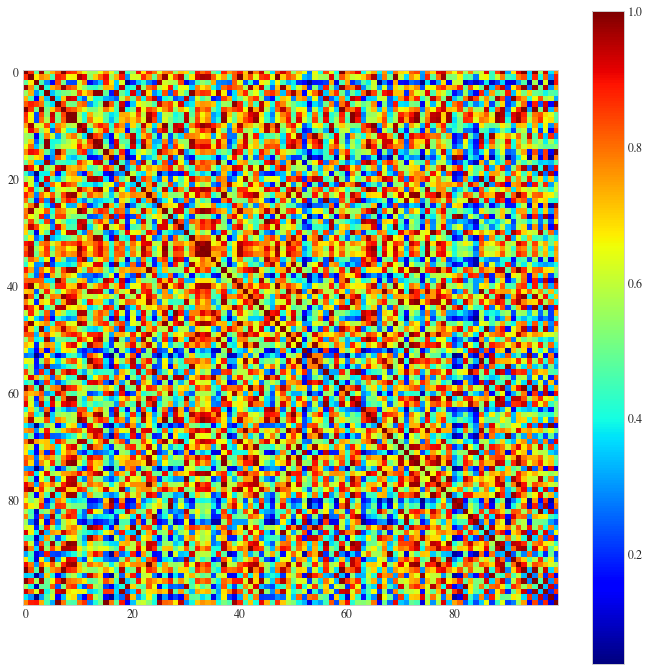

In [3]:
from sklearn.datasets import make_circles
from sklearn.metrics.pairwise import rbf_kernel
import matplotlib.pyplot as plt
plt.rcParams['axes.grid'] = False
X, y = make_circles(noise=0.2, factor=0.5, random_state=1)
K = rbf_kernel(X)
plt.figure(figsize=(12,12));plt.grid(False);plt.imshow(K, cmap='jet');plt.colorbar();

# Other Kernels

- **Polynomial**  $K(\mbf{x},\mbf{z}) = \big( \mbf{x}^T\mbf{z} + 1\big)^d$ where $d$ is the degree of the polynomial

- **Gaussian** $ K(\mbf{x},\mbf{z}) = \exp( -\gamma \| \mbf{x} -\mbf{z}  \|^2)$

- **Sigmoid** $K(\mbf{x},\mbf{z}) =  \tanh\big(\beta(\mbf{x}^T\mbf{z})+\alpha\big)$

# Property to be a valid Kernel (Necessary Condition)


- K should be **symmetric**  $K(x,z) = K(z,x)$
- For a given collections of examples $\{\mbf{x}_i,\ldots,\mbf{x}_m\}$, then:
$$K_{ij} = K(\mbf{x}_i,\mbf{x}_j)$$ is **symmetric** and **PSD** (positive semi definite)


- **Symmetric** because of the commutative property of the inner product

# PSD for Kernels
Assume we have a kernel $K$, we show it is PSD:

$$\forall \mbf{z} \neq 0 \implies \mbf{z} ^T \mathbf{K} \mbf{z} \ge 0 $$

$$
\begin{aligned}
\mbf{z} ^T \mathbf{K} \mbf{z}&=\sum_{i} \sum_{j} z_{i} K_{i j} z_{j} \\
&=\sum_{i} \sum_{j} z_{i} \bmf{\phi}\left(x^{(i)}\right)^{T} \bmf{\phi}\left(x^{(j)}\right) z_{j} \\
&=\sum_{i} \sum_{j} z_{i} \sum_{k} \phi_{k}\left(x^{(i)}\right) \phi_{k}\left(x^{(j)}\right) z_{j} \\
&=\sum_{k} \sum_{i} \sum_{j} z_{i} \phi_{k}\left(x^{(i)}\right) \phi_{k}\left(x^{(j)}\right) z_{j} \qquad \sum_{i,j}a_ia_j = \Big(\sum_i a_i\Big)^2\\
&=\sum_{k}\left(\sum_{i} z_{i} \phi_{k}\left(x^{(i)}\right)\right)^{2} \\
& \geq 0 .
\end{aligned}
$$

# Necessary Conditions are also Sufficient (Mercer's Theorem)

Let $K$ be a function, $K : \mathcal{X} \times \mathcal{X} \mapsto \mathbb{R}$ where $\mathcal{X}=\mathbb{R}^d$, then for $K$ to be a **valid (Mercer) kernel**, <ins>it is necessary and sufficient</ins> that for any
$\{\mbf{x}_1,\ldots,\mbf{x}_m\}$, the corresponding kernel matrix is **symmetric positive semi-definite**.

# How to prove K is a proper Kernel

Three options:

1. Construct $\phi$ so that $K(x,z) = \phi(x)^T \phi(z)$ **OR**
2. Use Mercer's Theorem: for any $\{\mbf{x}_1,\ldots,\mbf{x}_m\}$ then $K_{ij}=K(x_i,x_j)$ is **symmetric positive semi-definite**.  **OR**
3. $\forall f(x) \implies \int \int f(x)K(x,x^{\prime})f(x^{\prime}) dx dx^{\prime} \ge 0 $

# Artificial Intelligence and Machine Learning

## Unit II


**Iacopo Masi**


May 6, 2022

# Tracking of Attendance to cope with COVID-19

Token prodigit for this lecture:
## `219319`

Please use this code to make your presence on prodigit

https://prodigit.uniroma1.it/


The code for the building is:
## 	`AULA 3 -- CU028-E01P01L001`

# This lecture material is taken from

- [Stanford notes Kernels and SVM](http://cs229.stanford.edu/summer2019/cs229-notes3.pdf)
- [Cornell ML Course](https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote09.html)
- [Tibshirani Chapter 4.5 page 129](#)
- [Bishop Chapter 7](#)

# Support Vector Machines (SVM)

## Invented in the '90s

_Developed at AT&T Bell Laboratories by Vladimir Vapnik with colleagues (Boser et al., 1992, Guyon et al., 1993, Cortes and Vapnik, 1995_

# SVM  - Support Vector Machines

It is a **discriminative, supervised classification** algorithm **(SVC)** though it can be used for regression **(SVR)** and **outlier detection** too. A bit of change in notation:
- $y \in \{+1, -1\}$
- $\mbf{w} \in \mathbb{R}^d,\mbf{b} \in \mathbb{R} $
- $\mbf{x} \in \mathbb{R}^d $

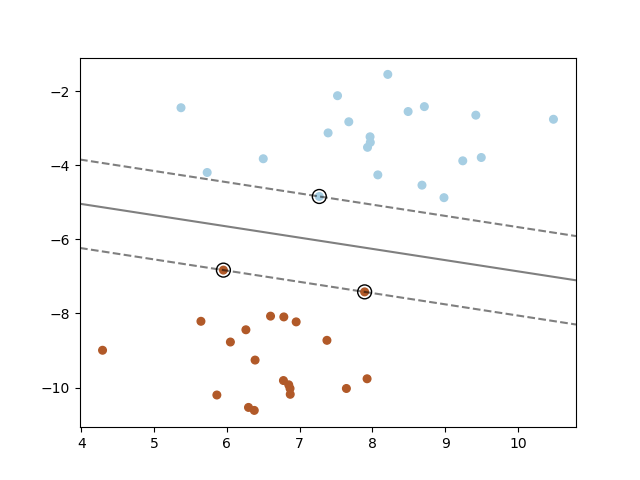

# SVM  - Support Vector Machines

We classify as $$\mbf{w}^T\mbf{x} + b$$

We want:

$$ \begin{cases}
\mbf{w}^T\mbf{x} + b > 0 \quad y=+1\\
\mbf{w}^T\mbf{x} + b < 0 \quad y=-1\\
\end{cases} $$

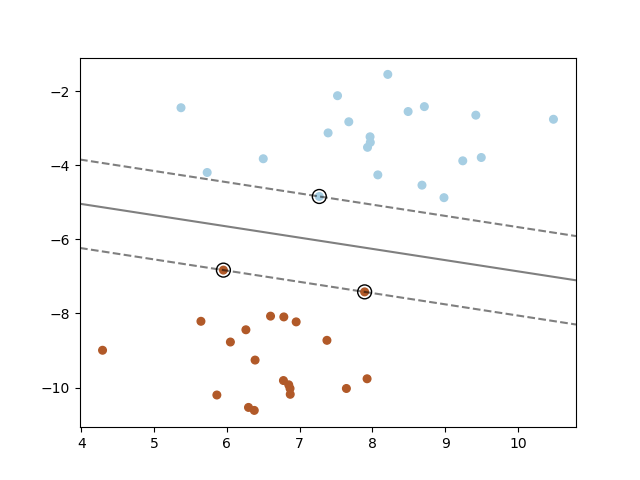

# SVM  - Support Vector Machines

We classify as $$\mbf{w}^T\mbf{x} + b$$

We want (written in a compact way):

$$
\operatorname{sign}\big(\mbf{w}^T\mbf{x}_i + b\big)
$$

$$\operatorname{sign}(z)= \begin{cases} +1, & \mbox{if } z\ge0 \\ 
-1, & \mbox{if } z<0\end{cases}$$

{{import numpy as np;import matplotlib.pyplot as plt;x = np.arange(-20.0, 20.0, 0.1);y = np.sign(x);plt.plot(x,y);}}

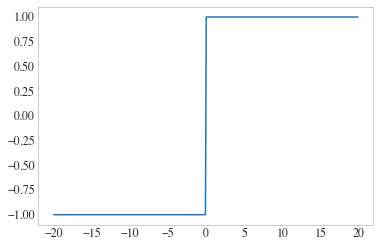

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-20.0, 20.0, 0.1)
y = np.sign(x)
plt.plot(x,y);

# Who remembers when we saw $\mathbf{w}\mathbf{x} + b$ for the first time?

# Hyperplanes

**Hyperplane**: a generalization to higher dimensions of a line ($D=2$) or of a plane ($D=3$).
In an $d$-dimensional vector space, a hyperplane has $d-1$ dimensions and **divides the space into two half-spaces.**

$$ \mathbf{w}\mathbf{x} + \mathbf{b} = 0$$ where $\mathbf{w}$ is a vector normal to the hyperplane and $\mathbf{b}$ is an offset

<img width='30%' src='https://d2l.ai/_images/space-division.svg' />

# Hyperplanes

**Hyperplane**: a generalization to higher dimensions of a line ($D=2$) or of a plane ($D=3$).
In an $d$-dimensional vector space, a hyperplane has $d-1$ dimensions and **divides the space into two half-spaces.**

$$ \mathbf{w}\mathbf{x} + \mathbf{b} = 0$$ where $\mathbf{w}$ is a vector normal to the hyperplane and $\mathbf{b}$ is an offset

<img width='30%' src='https://d2l.ai/_images/space-division-3d.svg' />

# Which hyperplane to choose?

## Just _one_ that separates the data?

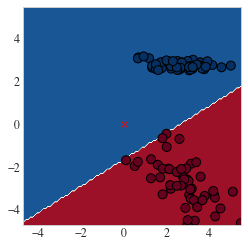

In [5]:
from sklearn.datasets import make_classification
from matplotlib import cm
from celluloid import Camera
from IPython.display import HTML

def get_support(minx, maxx):
    support = np.linspace(minx, maxx, 100)
    xx, yy = np.meshgrid(support, support)
    points = np.stack((xx.flatten(), yy.flatten()), axis=1)
    points = add_ones(points)
    return points, xx, yy

def plot_separating_plane(w, minx, maxx, points, xx, yy):
    dist = perceptron(w, points.T)
    dist = dist.reshape(xx.shape)
    plt.contourf(xx, yy, dist, cmap=cm.get_cmap("RdBu"))
    plt.plot(0, 0, 'rx')
    plt.axis('scaled')
    plt.xlim(minx, maxx)


def perceptron(w, xi):
    return np.maximum(np.sign(np.dot(w, xi)), 0)


def add_ones(X):
    bias = np.ones((X.shape[0], 1))
    X = np.hstack((X, bias))
    return X

def done(w, X):
    return np.all(y == perceptron(w, X.T))


def plot_classification(theta_curr, minx, maxx, support, xx, yy, X):
    plot_separating_plane(theta_curr, minx, maxx, support, xx, yy)
    plt.scatter(X[:, 0], X[:, 1], s=80,c=y,
            facecolors="none",
            zorder=10,
            edgecolors="k",
            cmap=cm.get_cmap("RdBu"))

### CAMERA ##########
fig = plt.figure()
camera = Camera(fig)

################## DATA #####################
X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, 
    n_clusters_per_class=1, 
    random_state=0, class_sep=2.8)
minx, maxx = X.min(), X.max()
support, xx, yy = get_support(minx, maxx)
X = add_ones(X)
############### PARAMS ########################
theta_curr = np.array([[-1, -2, 0]])
gamma = 1e-2
i = 0
text_kwargs = dict(ha='center', va='center', fontsize=10, color='C1')
################################################
plot_separating_plane(theta_curr, minx, maxx, support, xx, yy)
exit = False
# while not all are classified
while not done(theta_curr,X) and i < 100:
    # for all points
    for xi, yi in zip(X, y):
        prediction = perceptron(theta_curr, xi)
        # if prediction is wrong, update
        if prediction != yi:
            diff = yi - perceptron(theta_curr, xi)
            theta_curr = theta_curr + gamma * diff * xi
            plot_classification(theta_curr, minx, maxx, support, xx, yy, X)
            i += 1
            plt.text(-4, 4.5, str(i), **text_kwargs)
            camera.snap()
# write 20 frames with the last result for memory
for i in range(20):
    plot_classification(theta_curr, minx, maxx, support, xx, yy, X)
    camera.snap()
animation = camera.animate()
HTML(animation.to_html5_video())
#animation.save('plane.mp4')

# SVM Idea: Hyper-plane with maximum margin (gap)

# Large Margin
## Stay away from the data! Do not find just _an_ hyperplane (there are many infinite)
## Find the one with maximum margin or gap!

- H1 does not separate the classes. 
- H2 does, but only with a small margin. 
- H3 separates them with the maximal margin.
<br><br>

<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Svm_separating_hyperplanes_%28SVG%29.svg/1024px-Svm_separating_hyperplanes_%28SVG%29.svg.png" width='30%'/><center/>

# Functional Margin (wrong)

Instead of using `sign`

$$
\operatorname{sign}\big(\mbf{w}^T\mbf{x}_i + b\big) > 0
$$

$$\operatorname{sign}(z)= \begin{cases} +1, & \mbox{if } z\ge0 \\ 
-1, & \mbox{if } z<0\end{cases}$$

let's consider the distance as:

We want:

$$ \begin{cases}
\mbf{w}^T\mbf{x} + b > 0 \quad y=+1\\
\mbf{w}^T\mbf{x} + b < 0 \quad y=-1\\
\end{cases} $$

# Functional Margin (wrong)

Instead of using `sign`:

$$
\operatorname{sign}\big(\mbf{w}^T\mbf{x}_i + b\big) > 0
$$

$$\operatorname{sign}(z)= \begin{cases} +1, & \mbox{if } z\ge0 \\ 
-1, & \mbox{if } z<0\end{cases}$$

let's consider the distance as:

We want:

$$ y\big(\mbf{w}^T\mbf{x} + b \big)> 0$$

- Idea multiply by $\vert y \vert$ so that the distance $\mbf{w}^T\mbf{x} + b$ is kept since $\vert y \vert=1$ 
- use the $\operatorname{sign}(y)$ to rectify the sign to always positive
- The above equation means that we are always **correct both with positive and negative example** (this is that we want when learning)

# Maximizing the Functional Margin (wrong)

Not only higher than zero but better at least distant $\gamma$, which is the gap or **margin**

$$ y\big(\mbf{w}^T\mbf{x} + b \big) \gg 0$$

# Maximizing the Functional Margin (wrong)

Not only higher than zero but better at least distant $\gamma$, which is the gap or **margin**

$$ y\big(\mbf{w}^T\mbf{x} + b \big) \ge \gamma$$

# We can fool the Functional Margin (wrong)

<ins>Without changing the separating hyperplane</ins>, we can increase the margin as we want assuming $\alpha>0$: 
    
$$ y\big(\mbf{w}^T\mbf{x} + b \big) \gg y\big(\alpha\mbf{w}^T\mbf{x} + \alpha b \big)$$

For example $\alpha=2$, we can increase the functional margin by setting $\mbf{w}\leftarrow 2\mbf{w}$ and $b \leftarrow {2b}$.

# Geometric Margin


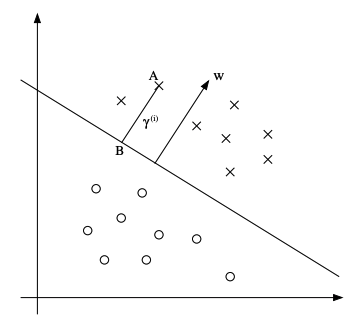


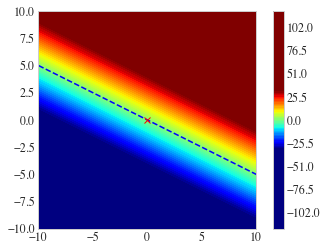

In [6]:
w0, w1, alpha = 1,2,4
support = np.linspace(-10,10,100)
xx,yy = np.meshgrid(support,support)
w = np.array([w0,w1])*alpha
dim = xx.shape
points = np.stack((xx.flatten(), yy.flatten()),axis=1)
dist = np.dot(w,points.T)
dist = dist.reshape(dim)
plt.contourf(xx,yy,dist,levels=200,cmap='jet');
plt.plot(-w1*support,w0*support,'b--')
plt.plot(0,0,'rx')
plt.axis('scaled');
plt.colorbar();
plt.xlim(-10,10);
plt.clim(-32,32)

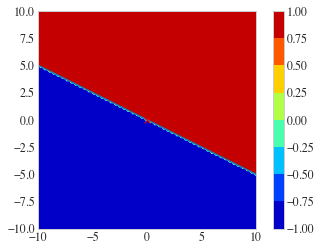

In [7]:
w0, w1 = 1,2
support = np.linspace(-10,10,100)
xx,yy = np.meshgrid(support,support)
w = np.array([w0,w1])
dim = xx.shape
points = np.stack((xx.flatten(), yy.flatten()),axis=1)
dist = np.sign(np.dot(w,points.T))
dist = dist.reshape(dim)
plt.contourf(xx,yy,dist,cmap='jet');
plt.plot(-w1*support,w0*support)
plt.plot(0,0,'rx')
plt.axis('scaled');
plt.colorbar();
plt.xlim(-10,10);

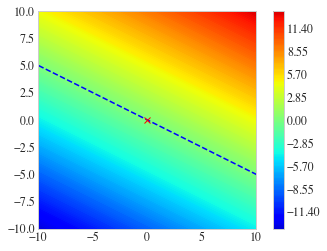

In [8]:
w0, w1, alpha = 1,2,100
support = np.linspace(-10,10,100)
xx,yy = np.meshgrid(support,support)
w = np.array([w0,w1])*alpha
dim = xx.shape
points = np.stack((xx.flatten(), yy.flatten()),axis=1)
dist = np.dot(w/np.linalg.norm(w),points.T)
dist = dist.reshape(dim)
plt.contourf(xx,yy,dist,levels=200,cmap='jet');
plt.plot(-w1*support,w0*support,'b--')
plt.plot(0,0,'rx')
plt.axis('scaled');
plt.colorbar();
plt.xlim(-10,10);
plt.clim(-16,16);

# SVM Assumption (for now): the data _is_ linearly separable

# Geometric Margin (correct)


**Geometry:** we have to project the point on the plane

<br><br>
<center>
    <img src='figs/svm_margin_definition.png' width='50%'>
</center>

# Geometric Margin for Positive = Margin for Negative


**First observation:** the maximum margin is the same on both side (positive and negative points) _this seems wrong_
<br><br>
<center>
    <img src='figs/svm_margin_equal.png' width='40%'>
</center>

# Geometric Margin for Positive = Margin for Negative


**First observation:** Assume $\gamma_+ \neq \gamma_-$, can you find a better plane?
<br><br>
<center>
    <img src='figs/svm_margin_notequal.png' width='40%'>
</center>

# Geometric Margin for Positive = Margin for Negative


**First observation:** the maximum margin is the same on both side (positive and negative points) _this seems wrong_
<br><br>
<center>
    <img src='figs/svm_margin_notequal_2.png' width='40%'>
</center>

# Definition of Geometric Margin

What do we know:
- $\mathbf{w}$ is perpendicular to the plane (**normal** to the plane) _why it is so?_
- $\mathbf{x}_p$ lies on the plane, therefore, $\mbf{w}^T\mbf{x}_p+b=0$ must be true.

What is the margin $\gamma$ in function of $\mbf{x},\mbf{w},b$?

<center>
    <img src='figs/svm_geom_marginn.png' width='40%'>
</center>

# Definition of Geometric Margin

- $\mathbf{w}$ is perpendicular to the plane (normal to the plane)
- $\mathbf{x}_p$ lies on the plane, therefore, $\mbf{w}^T\mbf{x}_p+b=0$ must be true.

$$ \mathbf{x} - \mathbf{x}_p = \bmf{\gamma} \implies \mathbf{x}_p = \mathbf{x} -   \bmf{\gamma}$$

<br><br>
<center>
    <img src='figs/svm_geom_marginn.png' width='40%'>
</center>

# Definition of Geometric Margin

- $\mathbf{w}$ is perpendicular to the plane (normal to the plane) $\implies \bmf{\gamma} = \alpha\mbf{w}$
- $\mathbf{x}_p$ lies on the plane, therefore, $\mbf{w}^T\mbf{x}_p+b=0$ must be true.

$$ \mathbf{x} - \mathbf{x}_p = \bmf{\gamma} \implies \mathbf{x}_p = \mathbf{x} -   \bmf{\gamma}$$

$$ \mbf{w}^T \big(  \mathbf{x} -   \bmf{\gamma} \big)+b=0 \implies \mbf{w}^T \big(  \mathbf{x} -   \bmf{\gamma} \big)+b=0  $$
<br><br>
<center>
    <img src='figs/svm_geom_marginn.png' width='40%'>
</center>

# Definition of Geometric Margin

- $\mathbf{w}$ is perpendicular to the plane (normal to the plane) $\implies \bmf{\gamma} = \alpha\mbf{w}$
- $\mathbf{x}_p$ lies on the plane, therefore, $\mbf{w}^T\mbf{x}_p+b=0$ must be true.

$$ \mathbf{x} - \mathbf{x}_p = \bmf{\gamma} \implies \mathbf{x}_p = \mathbf{x} -   \bmf{\gamma}$$

$$ \mbf{w}^T \big(  \mathbf{x} -   \bmf{\gamma} \big)+b=0 \implies \mbf{w}^T \big(  \mathbf{x} -   \bmf{\gamma} \big)+b=0  $$

$$ \mbf{w}^T \big(  \mathbf{x} -   \alpha\mbf{w} \big)+b=0   $$
<center>
    <img src='figs/svm_geom_marginn.png' width='40%'>
</center>

# Definition of Geometric Margin

- $\mathbf{w}$ is perpendicular to the plane (normal to the plane) $\implies \bmf{\gamma} = \alpha\mbf{w}$
- $\mathbf{x}_p$ lies on the plane, therefore, $\mbf{w}^T\mbf{x}_p+b=0$ must be true.

$$ \mathbf{x} - \mathbf{x}_p = \bmf{\gamma} \implies \mathbf{x}_p = \mathbf{x} -   \bmf{\gamma}$$

$$ \mbf{w}^T \big(  \mathbf{x} -   \bmf{\gamma} \big)+b=0 \implies \mbf{w}^T \big(  \mathbf{x} -   \bmf{\gamma} \big)+b=0  $$

$$ \mbf{w}^T \big(  \mathbf{x} -   \alpha\mbf{w} \big)+b=0   $$

$$ \mbf{w}^T \mathbf{x} -   \alpha\mbf{w}^T \mbf{w} +b=0   \qquad \text{solve for alpha (alpha is the length of $\gamma$)}$$
<center>
    <img src='figs/svm_geom_marginn.png' width='40%'>
</center>

# Definition of Geometric Margin

- $\mathbf{w}$ is perpendicular to the plane (normal to the plane) $\implies \bmf{\gamma} = \alpha\mbf{w}$
- $\mathbf{x}_p$ lies on the plane, therefore, $\mbf{w}^T\mbf{x}_p+b=0$ must be true.

$$ \mathbf{x} - \mathbf{x}_p = \bmf{\gamma} \implies \mathbf{x}_p = \mathbf{x} -   \bmf{\gamma}$$

$$ \mbf{w}^T \big(  \mathbf{x} -   \bmf{\gamma} \big)+b=0 \implies \mbf{w}^T \big(  \mathbf{x} -   \bmf{\gamma} \big)+b=0  $$

$$ \mbf{w}^T \big(  \mathbf{x} -   \alpha\mbf{w} \big)+b=0   $$

$$ \mbf{w}^T \mathbf{x} - \alpha\mbf{w}^T \mbf{w} +b=0   \qquad \text{solve for alpha (alpha is the length of $\gamma$)}$$

$$ \alpha = \frac{\mbf{w}^T \mathbf{x}+b}{\mbf{w}^T \mbf{w}}$$

<center>
    <img src='figs/svm_geom_marginn.png' width='40%'>
</center>

# Definition of Geometric Margin

- $\mathbf{w}$ is perpendicular to the plane (normal to the plane) $\implies \bmf{\gamma} = \alpha\mbf{w}$
- $\mathbf{x}_p$ lies on the plane, therefore, $\mbf{w}^T\mbf{x}_p+b=0$ must be true.

Given that $$ \bmf{\gamma} = \alpha\mbf{w} \implies \bmf{\gamma} =  \Big(\frac{\mbf{w}^T \mathbf{x}+b}{\mbf{w}^T \mbf{w}} \Big) \mbf{w}$$

<br><br>
<center>
    <img src='figs/svm_geom_marginn.png' width='40%'>
</center>

# Definition of Geometric Margin

- $\mathbf{w}$ is perpendicular to the plane (normal to the plane) $\implies \bmf{\gamma} = \alpha\mbf{w}$
- $\mathbf{x}_p$ lies on the plane, therefore, $\mbf{w}^T\mbf{x}_p+b=0$ must be true.

Given that $$ \bmf{\gamma} = \alpha\mbf{w} \implies \bmf{\gamma} =  \Big(\frac{\mbf{w}^T \mathbf{x}+b}{\mbf{w}^T \mbf{w}} \Big) \mbf{w}$$

What is the norm of $\bmf{\gamma}$ aka $\vert\vert \bmf{\gamma} \vert\vert_2$?

$$ \vert\vert \bmf{\gamma} \vert\vert_2 = \left|\left|\Big(\frac{\mbf{w}^T \mathbf{x}+b}{\mbf{w}^T \mbf{w}} \Big) \mbf{w}\right|\right|_2 = \frac{\mbf{w}^T \mathbf{x}+b}{\mbf{w}^T \mbf{w}} \left|\left| \mbf{w} \right|\right|_2$$ 

<center>
    <img src='figs/svm_geom_marginn.png' width='40%'>
</center>

# Definition of Geometric Margin

- $\mathbf{w}$ is perpendicular to the plane (normal to the plane) $\implies \bmf{\gamma} = \alpha\mbf{w}$
- $\mathbf{x}_p$ lies on the plane, therefore, $\mbf{w}^T\mbf{x}_p+b=0$ must be true.

Given that $$ \bmf{\gamma} = \alpha\mbf{w} \implies \bmf{\gamma} =  \Big(\frac{\mbf{w}^T \mathbf{x}+b}{\mbf{w}^T \mbf{w}} \Big) \mbf{w}$$

What is the norm of $\bmf{\gamma}$ aka $\vert\vert \bmf{\gamma} \vert\vert_2$?

$$ \vert\vert \bmf{\gamma} \vert\vert_2 = \left|\left|\Big(\frac{\mbf{w}^T \mathbf{x}+b}{\mbf{w}^T \mbf{w}} \Big) \mbf{w}\right|\right|_2 = \frac{\mbf{w}^T \mathbf{x}+b}{\mbf{w}^T \mbf{w}} \left|\left| \mbf{w} \right|\right|_2 = \frac{\mbf{w}^T \mathbf{x}+b}{\sqrt{\mbf{w}^T\mbf{w}}} $$ 
<center>
    <img src='figs/svm_geom_marginn.png' width='40%'>
</center>

# Definition of Geometric Margin

- $\mathbf{w}$ is perpendicular to the plane (normal to the plane) $\implies \bmf{\gamma} = \alpha\mbf{w}$
- $\mathbf{x}_p$ lies on the plane, therefore, $\mbf{w}^T\mbf{x}_p+b=0$ must be true.

Given that $$ \bmf{\gamma} = \alpha\mbf{w} \implies \bmf{\gamma} =  \Big(\frac{\mbf{w}^T \mathbf{x}+b}{\mbf{w}^T \mbf{w}} \Big) \mbf{w}$$

What is the norm of $\bmf{\gamma}$ aka $\vert\vert \bmf{\gamma} \vert\vert_2$?

$$ \vert\vert \bmf{\gamma} \vert\vert_2 = \left|\left|\Big(\frac{\mbf{w}^T \mathbf{x}+b}{\mbf{w}^T \mbf{w}} \Big) \mbf{w}\right|\right|_2 = \frac{\mbf{w}^T \mathbf{x}+b}{\mbf{w}^T \mbf{w}} \left|\left| \mbf{w} \right|\right|_2 = \frac{\mbf{w}^T \mathbf{x}+b}{\mbf{w}^T \mbf{w}} \sqrt{\mbf{w}^T\mbf{w}}$$ 

<br><br>
<center>
    <img src='figs/svm_geom_marginn.png' width='40%'>
</center>

# Definition of Geometric Margin

- $\mathbf{w}$ is perpendicular to the plane (normal to the plane) $\implies \bmf{\gamma} = \alpha\mbf{w}$
- $\mathbf{x}_p$ lies on the plane, therefore, $\mbf{w}^T\mbf{x}_p+b=0$ must be true.

Given that $$ \bmf{\gamma} = \alpha\mbf{w} \implies \bmf{\gamma} =  \Big(\frac{\mbf{w}^T \mathbf{x}+b}{\mbf{w}^T \mbf{w}} \Big) \mbf{w}$$

What is the norm of $\bmf{\gamma}$ aka $\vert\vert \bmf{\gamma} \vert\vert_2$?

$$ \vert\vert \bmf{\gamma} \vert\vert_2 =  \frac{\mbf{w}^T \mathbf{x}+b}{\mbf{w}^T \mbf{w}} \left|\left| \mbf{w} \right|\right|_2 = \frac{\mbf{w}^T \mathbf{x}+b}{\vert\vert\mbf{w} \vert\vert_2} $$ 
<center>
    <img src='figs/svm_geom_marginn.png' width='40%'>
</center>

# SVM considers the _smallest_ margin...

The smallest margin among the training points: $\mathbf{D}=\{\mbf{x}_i,y_i\}_{i=1}^N$:

$$  \gamma_{\text{min}} \doteq \gamma(\mbf{w},b;\mbf{x}) = \min_{\mbf{x}\in \mathbf{D}} \frac{\mbf{w}^T \mathbf{x}+b}{\vert\vert\mbf{w} \vert\vert_2} $$ 

<br>
<center>
    <img src='figs/svm_margin_definition.png' width='50%'>
</center>

# SVM considers the _smallest_ margin and makes it large (max)

$$ \max_{\mbf{w},b} \left( \min_{\mbf{x}\in \mathbf{D}} \frac{\mbf{w}^T \mathbf{x}+b}{\vert\vert\mbf{w} \vert\vert_2}   \right) = \max_{\mbf{w},b} \gamma_{\text{min}}$$

**Are we done with this?**

<br><br>
<center>
    <img src='figs/svm_margin_definition.png' width='30%'>
</center>

# SVM considers the _smallest_ margin and makes it large (max)

$$ \max_{\mbf{w},b} \left( \min_{\mbf{x}\in \mathbf{D}} \frac{\mbf{w}^T \mathbf{x}+b}{\vert\vert\mbf{w} \vert\vert_2}   \right) = \max_{\mbf{w},b} \gamma_{\text{min}}$$

**Are we done with this? NO!**

<br><br>
<center>
    <img src='figs/svm_geom_margin_no_constraints.png' width='30%'>
</center>

# SVM maximum smallest margin to classify!

$$ \max_{\mbf{w},b} \left( \underbrace{\min_{\mbf{x}\in \mathbf{D}} \frac{\left|\mbf{w}^T \mathbf{x}+b\right|}{\vert\vert\mbf{w} \vert\vert_2}   }_{\gamma_{\text{min}}}\right)$$
<br><br>
$$\forall i \qquad  y_i \big( \mbf{w}^T \mathbf{x}_i+b \big) \ge \gamma_{\text{min}}$$
<br><br>
<center>
    <img src='figs/svm_geom_margin_classify.png' width='30%'>
</center>

# The hyper-plane $\mbf{w}$ is scale-invariant

It means that we can rescale the $\mbf{w}$ in the way we want $\mbf{w} \leftarrow \kappa \mbf{w}$, $\mbf{b} \leftarrow \kappa \mbf{b}$.

So we can use this property to set the margin as we want dividing by $\vert\vert \mbf{w} \vert \vert$.

We have the freedom to rescale the hyper-plane.
Given that the hyper-plane $\mbf{w}$ is scale invariant we can set: $y_{\text{min}}\left(\mbf{w}^T \mathbf{x}_{\text{min}}+b \right)=1$ or in other words **the value of the margin we set does not matter.**

$$ \max_{\mbf{w},b} \left( \underbrace{\min_{\mbf{x}\in \mathbf{D}} \frac{\left|\mbf{w}^T \mathbf{x}+b\right|}{\vert\vert\mbf{w} \vert\vert_2}   }_{\gamma_{\text{min}}}\right)$$
<br>
$$\forall i \qquad  y_i \big( \mbf{w}^T \mathbf{x}_i+b \big) \ge 1$$
<br>
<center>
    <img src='figs/svm_geom_margin_classify.png' width='30%'>
</center>

# The hyper-plane $\mbf{w}$ is scale-invariant

It means that we can rescale the $\mbf{w}$ in the way we want $\mbf{w} \leftarrow \kappa \mbf{w}$, $\mbf{b} \leftarrow \kappa \mbf{b}$.

So we can use this property to set the margin as we want dividing by manipulating $\vert\vert \mbf{w} \vert \vert$.

We have the freedom to rescale the hyper-plane.

Given that the hyper-plane $\mbf{w}$ is scale invariant we can set: $y_{\text{min}}\left(\mbf{w}^T \mathbf{x}_{\text{min}}+b \right)=1 \implies \left|\mbf{w}^T \mathbf{x}+b\right|=1 $ so thankfully the inside min is removed.


$$ \max_{\mbf{w},b} \frac{1}{\vert\vert\mbf{w} \vert\vert_2}$$
<br><br>
$$\forall i \qquad  y_i \big( \mbf{w}^T \mathbf{x}_i+b \big) \ge 1$$
<br><br>
<center>
    <img src='figs/svm_margin_bishop.png' width='30%'>
</center>

# Final Formulation

$$ \min_{\mbf{w},b}\vert\vert\mbf{w} \vert\vert_2^2$$
<br><br>
$$\forall i \qquad  y_i \big( \mbf{w}^T \mathbf{x}_i+b \big) \ge 1$$
<br><br>

- Optimize it with **[Quadratic Programming with Linear Constraints](https://en.wikipedia.org/wiki/Quadratic_programming)**

- if the data is separable, there will exist an **unique and optimal solutions.**

<center>
    <img src='figs/svm_margin_bishop.png' width='30%'>
</center>

# Question

How much is large the gap betweem the blue planes?



<center>
    <img src='figs/svm_margin_bishop.png' width='30%'>
</center>



# Question

How much is large the gap betweem the blue planes?

$$\gamma_{min}= \frac{\vert \mbf{w}^T \mathbf{x}+b\vert }{\vert\vert\mbf{w} \vert\vert_2} \quad \text{but} \quad \vert \mbf{w}^T \mathbf{x}+b\vert=1$$.

$$\operatorname{full-gap} =  2\gamma_{min} = \frac{2}{\vert\vert\mbf{w} \vert\vert_2}$$

<center>
    <img src='figs/svm_margin_bishop.png' width='30%'>
</center>



# Why the name Support Vector Machine?



The points for which $$y\left(\mbf{w}^T\mbf{x} + b \right) = 1$$ are called **support vectors** and are those more difficult to classify.

The support vectors are indicates below with a circle.

- Will the hyper-plane change 
if I change the support vector? 
- What about the other points non support vectors?

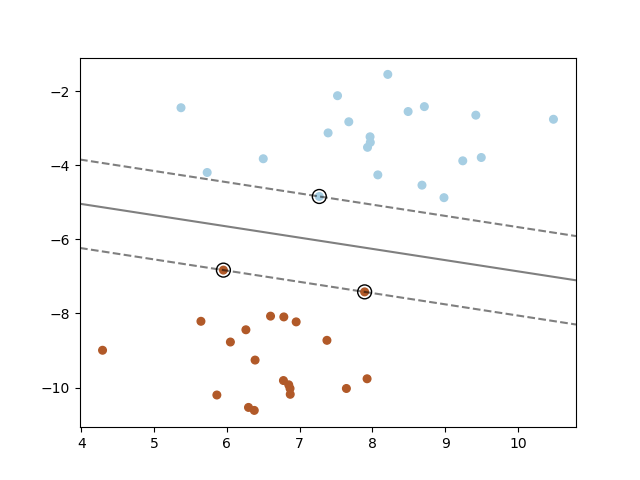

# Test Time



<center>
    <img src='figs/svm-testtime.png' width='70%'>
</center>


# Two more Things

## 1) What if the data is non-linearly separable?
## 2) What about Kernel methods?

# Non-linearly Separable Case [but still close to linear]

**Key idea:** allow a term to ***violate a few points*** (this allows to say: "i am not going to conside these points")

<center>
    <img src='figs/svm_non_linearly_sep.png' width='50%'>
</center>


# SVM with soft margins

$\zeta_i$ are **slack variables** for each training point.

- You can exclude a point by increase $\zeta_i$ but.... 
- ....you pay a penalty for it in the cost.

$$ \min_{\mbf{w},b}\vert\vert\mbf{w} \vert\vert_2^2 + C \sum_i^n \zeta_i$$
<br><br>
$$\forall i \qquad  y_i \big( \mbf{w}^T \mathbf{x}_i+b \big) \ge 1-\zeta_i,~~~~~~ \zeta_i \ge 0$$


# SVM with soft margins: $C$ controls the trade-off

- $C$ equals zero revert to previous formulation (assumes linearly separable)
- $C$ set to a high value, we drop the idea of the margin and we 'discard' points in the training

Note, this formulation may allow to 'fix' labeling errors up to some extend.

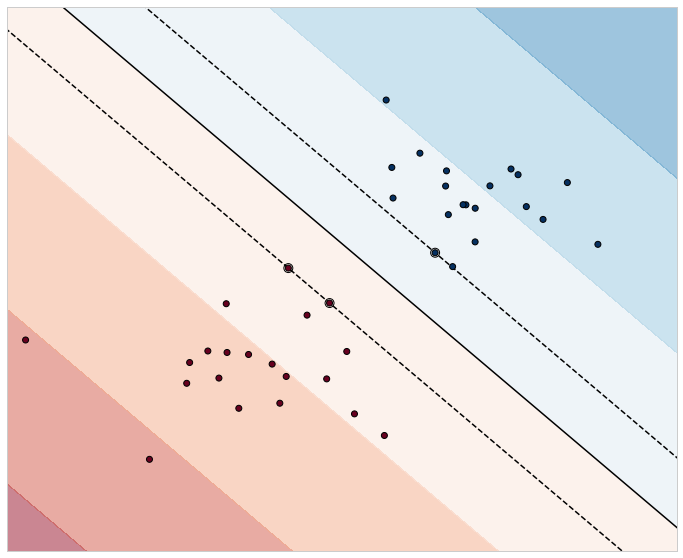

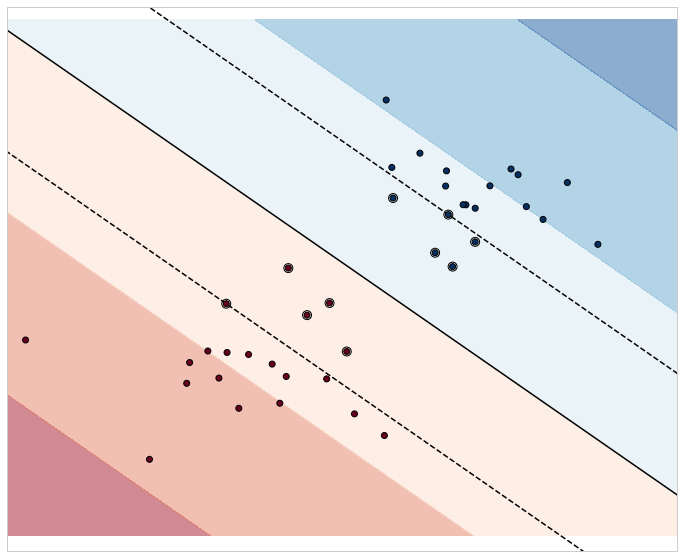

In [9]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn import svm

# we create 40 separable points
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20

# figure number
fignum = 1

# fit the model
for name, penalty in (("unreg", 1), ("reg", 0.05)):

    clf = svm.SVC(kernel="linear", C=penalty)
    clf.fit(X, Y)

    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors (margin away from hyperplane in direction
    # perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
    # 2-d.
    margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
    yy_down = yy - np.sqrt(1 + a ** 2) * margin
    yy_up = yy + np.sqrt(1 + a ** 2) * margin

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(12, 10))
    plt.clf()
    plt.plot(xx, yy, "k-")
    plt.plot(xx, yy_down, "k--")
    plt.plot(xx, yy_up, "k--")

    plt.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=80,
        facecolors="none",
        zorder=10,
        edgecolors="k",
        cmap=cm.get_cmap("RdBu"),
    )
    plt.scatter(
        X[:, 0], X[:, 1], c=Y, zorder=10, cmap=cm.get_cmap("RdBu"), edgecolors="k"
    )

    plt.axis("tight")
    x_min = -4.8
    x_max = 4.2
    y_min = -6
    y_max = 6

    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # Put the result into a contour plot
    plt.contourf(XX, YY, Z, cmap=cm.get_cmap("RdBu"), alpha=0.5, linestyles=["-"])

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1

plt.show()

# SVM with soft constraints and Hinge-Loss:




$$
\xi_{i}=\left\{\begin{array}{cl}
1-y_{i}\left(\mathbf{w}^{T} \mathbf{x}_{i}+b\right) & \text { if } y_{i}\left(\mathbf{w}^{T} \mathbf{x}_{i}+b\right)<1 \\
0 & \text { if } y_{i}\left(\mathbf{w}^{T} \mathbf{x}_{i}+b\right) \geq 1
\end{array}\right.
$$
<br><br>
$$
\min _{\mathbf{w}, b} \underbrace{\mathbf{w}^{T} \mathbf{w}}_{l_{2} \text{regularizer }}+C \sum_{i=1}^{n} \underbrace{\max \left[1-y_{i}\left(\mathbf{w}^{T} \mathbf{x}+b\right), 0\right]}_{\text{hinge-loss }}
$$

# Hinge-Loss:

$$
\min _{\mathbf{w}, b} \underbrace{\mathbf{w}^{T} \mathbf{w}}_{l_{2} \text{regularizer }}+C \sum_{i=1}^{n} \underbrace{\max \left[1-y_{i}\left(\mathbf{w}^{T} \mathbf{x}+b\right), 0\right]}_{\text{hinge-loss }}
$$

{{eps = np.arange(-5,5);plt.plot(eps,np.maximum(1-eps,0));plt.xlabel('diff');plt.ylabel('Hing Loss');plt.xticks(np.arange(-5, 5, step=1));}}

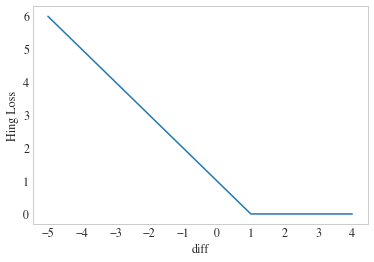

In [10]:
eps = np.arange(-5,5);plt.plot(eps,np.maximum(1-eps,0));plt.xlabel('diff');_=plt.ylabel('Hing Loss');
plt.xticks(np.arange(-5, 5, step=1));

# Yes, we can Kernelized them!

We'll pass on the formulation

<center><img src='figs/kernel_svm.png'></center>

# Yes, we can Kernelized them!

**SVM + Kernel** is a **very popular and strong algorithm!**

<center>
    <img src='https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_svc_001.png' width='50%'>
</center>


# Advantages

The advantages of support vector machines are:

- Effective in high dimensional spaces.

- Still effective in cases where number of dimensions is greater
  than the number of samples.

- Uses a subset of training points in the decision function (called
  **support vectors), so it is also memory efficient**.

- Versatile: different kernels can be
  specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

# Disadvantages

The disadvantages of support vector machines include:

- If the number of features is much greater than the number of
  samples, avoid over-fitting in choosing `svm_kernels` and regularization
  term is crucial.

- SVMs do not directly provide probability estimates, these are
  calculated using an expensive five-fold cross-validation